# **Clusterización K-Means**

El método K-Means es un algoritmo de agrupación (clusterización) ampliamente utilizado en el campo del aprendizaje automático y la minería de datos. Su objetivo principal es dividir un conjunto de datos en grupos o clústeres, donde los elementos dentro de un clúster son más similares entre sí que con elementos de otros clústeres. K-Means es un algoritmo no supervisado, lo que significa que no requiere etiquetas previas de clase y busca patrones intrínsecos en los datos. Aquí tienes una explicación paso a paso de cómo funciona el método K-Means:

* Inicialización de Centroides:

Comienza seleccionando aleatoriamente k puntos del conjunto de datos como centroides iniciales. K representa el número de clústeres deseados.

* Asignación de Puntos a los Clústeres:

Luego, cada punto de datos se asigna al clúster cuyo centroide esté más cerca de él en función de una métrica de distancia, comúnmente la distancia euclidiana.

* Recálculo de Centroides:

Después de asignar todos los puntos a los clústeres, se recalcula el centroide de cada clúster tomando la media de todos los puntos asignados a ese clúster.

* Repetición:

Los pasos 2 y 3 se repiten hasta que se cumpla un criterio de detención, como que los centroides no cambien significativamente o que se alcance un número máximo de iteraciones.
Resultado:

Una vez que el algoritmo converge, los datos se dividen en k clústeres, y cada punto de datos pertenece a un clúster. Los centroides finales representan el centro de cada clúster.
El método K-Means busca minimizar la suma de cuadrados de las distancias entre los puntos de datos y sus centroides, lo que se conoce como la "suma de cuadrados dentro de los clústeres" (WCSS, por sus siglas en inglés). En el método del codo, se elige el número óptimo de clústeres observando la curva de WCSS en función de k y seleccionando el punto en el que la disminución en WCSS comienza a aplanarse (el "codo").

El método K-Means es ampliamente utilizado para la segmentación de datos en diversos campos, como marketing, análisis de imágenes, procesamiento de texto y más. Es importante tener en cuenta que K-Means puede no funcionar óptimamente en todos los conjuntos de datos y podría requerir ajustes o consideraciones especiales, como la normalización de datos.



**Ejemplo:**

Supongamos que tenemos datos de ventas de una tienda minorista y queremos segmentar a nuestros clientes en grupos basados en su historial de compras. Los pasos que seguiremos son:

1. Simulación de Datos:

Primero, generemos un conjunto de datos de muestra que represente el historial de compras de los clientes.

In [ ]:
# Cargar la librería necesaria
install.packages("ggplot2")
library(ggplot2)

# Configuración de la semilla para hacer que los resultados sean reproducibles
set.seed(123)

# Generar datos de muestra
clientes <- data.frame(
  ClienteID = 1:100,
  ComprasAnuales = rnorm(100, mean = 5000, sd = 2000),
  ComprasMesuales = rnorm(100, mean = 400, sd = 150)
)

# Ver los primeros registros del conjunto de datos
head(clientes)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,ClienteID,ComprasAnuales,ComprasMesuales
,<int>,<dbl>,<dbl>
1,1,3879.049,293.4390
2,2,4539.645,438.5326
3,3,8117.417,362.9962
4,4,5141.017,347.8686
5,5,5258.575,257.2572
6,6,8430.130,393.2458


2. Análisis Exploratorio de Datos (EDA):

Antes de aplicar K-Means, es útil realizar un análisis exploratorio de datos para comprender las características de los clientes y determinar cuántos clusters podrían ser apropiados.

   ClienteID      ComprasAnuales   ComprasMesuales 
 Min.   :  1.00   Min.   : 381.7   Min.   : 92.01  
 1st Qu.: 25.75   1st Qu.:4012.3   1st Qu.:279.83  
 Median : 50.50   Median :5123.5   Median :366.13  
 Mean   : 50.50   Mean   :5180.8   Mean   :383.87  
 3rd Qu.: 75.25   3rd Qu.:6383.6   3rd Qu.:470.18  
 Max.   :100.00   Max.   :9374.7   Max.   :886.16  

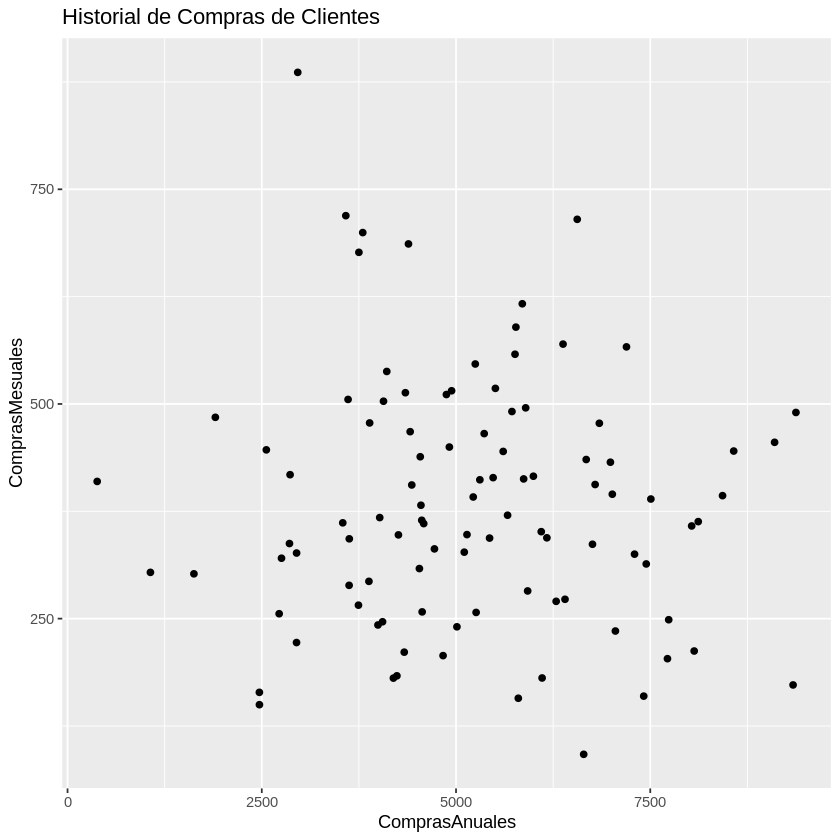

In [ ]:
# Resumen estadístico
summary(clientes)

# Gráfico de dispersión
ggplot(clientes, aes(ComprasAnuales, ComprasMesuales)) +
  geom_point() +
  labs(title = "Historial de Compras de Clientes")

3. Normalización de Datos (opcional):

Dependiendo de la escala de tus variables, podrías optar por normalizar los datos para que tengan la misma escala antes de aplicar K-Means. En este ejemplo, no lo haremos, ya que nuestras variables están en escalas similares.

La utilidad de la normalización en este contexto radica en que las variables "ComprasAnuales" y "ComprasMensuales" pueden tener unidades diferentes o rangos de valores muy dispares. Sin normalización, las diferencias en la escala de estas variables podrían influir en gran medida en la asignación de clústeres por parte del algoritmo K-Means. Al normalizar, garantizamos que todas las variables tengan un impacto similar en el proceso de agrupación, lo que conduce a resultados más coherentes y significativos.

Los resultados del análisis de clústeres se interpretarían de la misma manera que en el ejemplo anterior. La normalización de datos es una práctica común en análisis de datos y aprendizaje automático para garantizar que los algoritmos funcionen correctamente y que las interpretaciones sean válidas.

In [ ]:
# Normalizar los datos
#clientes_normalized <- clientes %>%
  #mutate(ComprasAnuales = scale(ComprasAnuales),
         #ComprasMensuales = scale(ComprasMensuales))

# Ver los primeros registros del conjunto de datos normalizado
#head(clientes_normalized)

4. Método de codo:

El método del codo es una técnica comúnmente utilizada para determinar el número óptimo de clústeres (k) en K-Means. Consiste en calcular el valor de la suma de cuadrados de las distancias entre los puntos de datos y sus respectivos centroides para diferentes valores de k y luego graficar estos valores. El "codo" en el gráfico representa el punto en el que la adición de más clústeres no proporciona una mejora significativa en la suma de cuadrados.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




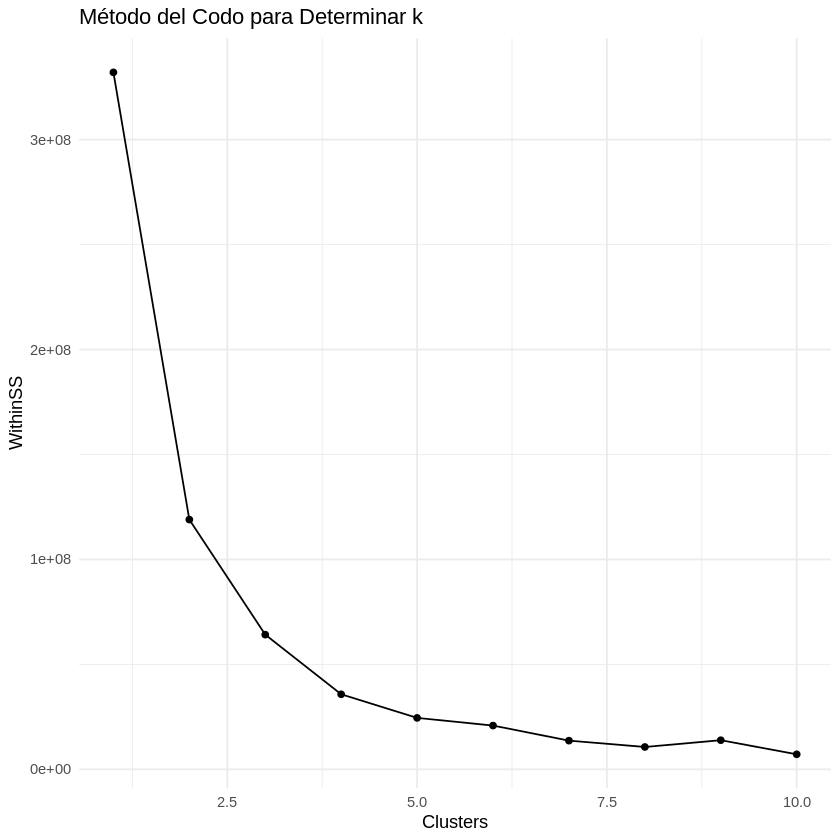

In [ ]:
# Cargar la librería necesaria
library(ggplot2)
library(dplyr)

# Configuración de la semilla para hacer que los resultados sean reproducibles
set.seed(123)

# Calcular la suma de cuadrados para diferentes valores de k
wss <- numeric(10)  # Almacenaremos los resultados aquí

for (i in 1:10) {
  kmeans_result <- kmeans(clientes[, 2:3], centers = i)
  wss[i] <- kmeans_result$tot.withinss
}

# Graficar el método del codo
elbow_plot <- data.frame(Clusters = 1:10, WithinSS = wss)

ggplot(elbow_plot, aes(x = Clusters, y = WithinSS)) +
  geom_line() +
  geom_point() +
  labs(title = "Método del Codo para Determinar k") +
  theme_minimal()

En este código, estamos iterando a través de diferentes valores de k (desde 1 hasta 10) y calculando la suma de cuadrados de las distancias para cada k. Luego, graficamos estos valores en un gráfico.

Al observar el gráfico resultante, busca el punto donde se produce un quiebre o codo en la curva. En este punto, el aumento en el número de clústeres ya no produce una disminución significativa en la suma de cuadrados. Ese valor de k es una buena elección para el número de clústeres.

Interpreta el gráfico para encontrar el número óptimo de clústeres en función de dónde ocurra el "codo". En este caso, podría ser un valor cercano a 3, lo que sugiere que segmentar a los clientes en tres clústeres sería una elección razonable.

5. Aplicación de K-Means:

A continuación, aplicaremos el algoritmo K-Means para agrupar a los clientes en clústeres. En este caso, utilizaremos k = 3 para agrupar a los clientes en tres segmentos.

In [ ]:
# Cargar la librería necesaria (ggplot2)
library(ggplot2)

# Configuración de la semilla para hacer que los resultados sean reproducibles
set.seed(123)

# Generar datos de muestra
clientes <- data.frame(
  ClienteID = 1:100,
  ComprasAnuales = rnorm(100, mean = 5000, sd = 2000),
  ComprasMensuales = rnorm(100, mean = 400, sd = 150)
)

# Ver los primeros registros del conjunto de datos
head(clientes)

# Aplicar K-Means con k = 3
set.seed(123)
kmeans_result <- kmeans(clientes[, 2:3], centers = 3)

# Visualizar los resultados de K-Means
kmeans_result

# Agregar los resultados del clúster al DataFrame original
clientes$Cluster <- as.factor(kmeans_result$cluster)

# Visualizar los clientes y sus características por clúster
clustered_clients <- split(clientes, clientes$Cluster)

for (cluster in names(clustered_clients)) {
  cat(paste("Cluster ", cluster, ":\n"))
  cat("Número de clientes en el clúster:", nrow(clustered_clients[[cluster]]), "\n")
  cat("Características promedio en el clúster:\n")
  print(colMeans(clustered_clients[[cluster]][c("ComprasAnuales", "ComprasMensuales")]))
  cat("\n")
}

# También puedes guardar los clientes en diferentes DataFrames si lo prefieres
cluster_0 <- clustered_clients$"1"
cluster_1 <- clustered_clients$"2"
cluster_2 <- clustered_clients$"3"


,ClienteID,ComprasAnuales,ComprasMensuales
,<int>,<dbl>,<dbl>
1,1,3879.049,293.4390
2,2,4539.645,438.5326
3,3,8117.417,362.9962
4,4,5141.017,347.8686
5,5,5258.575,257.2572
6,6,8430.130,393.2458


K-means clustering with 3 clusters of sizes 26, 29, 45

Cluster means:
  ComprasAnuales ComprasMensuales
1       7517.429         363.9994
2       3097.247         398.4719
3       5173.508         385.9362

Clustering vector:
  [1] 2 3 1 3 3 1 3 2 2 2 1 3 3 3 2 1 3 2 1 2 2 3 2 2 2 2 1 3 2 1 3 3 1 1 1 1 3
 [38] 3 3 3 2 3 2 1 1 2 3 2 1 3 3 3 3 1 3 1 2 3 3 3 3 2 3 2 2 3 3 3 1 1 2 2 1 2
 [75] 2 1 3 2 3 3 3 3 3 3 3 3 1 3 3 1 1 3 3 2 1 2 1 1 3 2

Within cluster sum of squares by cluster:
[1] 20157891 25821579 18194328
 (between_SS / total_SS =  80.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Cluster  1 :
Número de clientes en el clúster: 26 
Características promedio en el clúster:
  ComprasAnuales ComprasMensuales 
       7517.4286         363.9994 

Cluster  2 :
Número de clientes en el clúster: 29 
Características promedio en el clúster:
  ComprasAnuales ComprasMensuales 
       3097.2473         398.4719 

Cluster  3 :
Número de clientes en el clúster: 45 
Características promedio en el clúster:
  ComprasAnuales ComprasMensuales 
       5173.5082         385.9362 



In [ ]:
# Aplicar K-Means con k = 3 a los datos normalizados
#set.seed(123)
#kmeans_result <- kmeans(clientes_normalized[, 2:3], centers = 3)

# Visualizar los resultados de K-Means
#kmeans_result


6. Interpretación de Resultados:

El resultado incluye información sobre los centroides de los clústeres y a qué clúster pertenece cada cliente. También puedes obtener más información sobre el agrupamiento con kmeans_result$cluster.

Finalmente, podemos visualizar los clústeres en el gráfico de dispersión:

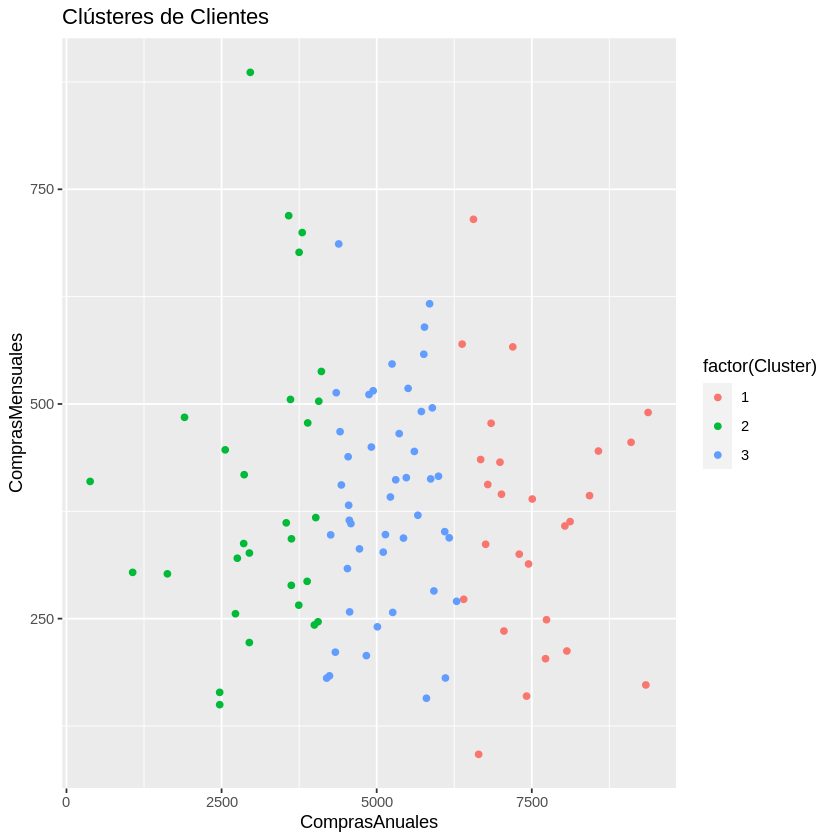

In [ ]:
# Gráfico de dispersión con clústeres coloreados
ggplot(clientes, aes(ComprasAnuales, ComprasMensuales, color = factor(Cluster))) +
  geom_point() +
  labs(title = "Clústeres de Clientes")

Interpretación de Resultados:

Hemos segmentado a los clientes en tres clústeres (Cluster 1, Cluster 2 y Cluster 3) basados en sus patrones de compras.
Puedes analizar las características de los clústeres para comprender las diferencias entre ellos y adaptar tu estrategia de marketing o ventas en consecuencia.
Este es un ejemplo simple de cómo aplicar K-Means en un contexto comercial en R. Puedes ajustar los parámetros y explorar diferentes números de clústeres según tus necesidades específicas.